# Analysis of NHANES Body Measurement Data.


##Introduction

The goal of this notebook is to analyze body measurements from the National Health and Nutrition Examination Survey (NHANES) in 2020 dataset. It uses NumPy for data manipulation, Matplotlib for plotting, and Pandas for data handling. It will explore the dataset by visualizing various statistical plots and computing essential numerical aggregates.

##1.Importing Necessary libraries

Import the required Python libraries that are needed for performing the data manipulation, analysis, and visualization tasks.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##2.Loading the Data

Load two CSV files into memory: nhanes_adult_male_bmx_2020.csv and nhanes_adult_female_bmx_2020.csv. These files contain the body measurements of adult males and females, which we will analyze.

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

male_path = "/content/drive/My Drive/NHANES/nhanes_adult_male_bmx_2020.csv"
female_path = "/content/drive/My Drive/NHANES/nhanes_adult_female_bmx_2020.csv"

Mounted at /content/drive


##3.Reading the Data and Creating Numpy Matrices

To convert the data from pandas DataFrames into numpy arrays (matrices) for easier manipulation. We'll extract the relevant columns for the analysis: weight, height, upper arm length, upper leg length, arm circumference, hip circumference, and waist circumference.

In [ ]:

male_data = np.genfromtxt(male_path, delimiter=",", skip_header=1)
female_data = np.genfromtxt(female_path, delimiter=",", skip_header=1)


male_colnames = ["weight", "height", "arm_length", "leg_length", "arm_circ", "hip_circ", "waist_circ"]
female_colnames = male_colnames

male_df = pd.DataFrame(male_data, columns=male_colnames)
female_df = pd.DataFrame(female_data, columns=female_colnames)

## 4. Visualizing the Weight Distribution for Males and Females

 Now visualize the weight distribution for both male and female participants using histograms. These histograms will help us compare the body weight distribution in each group.

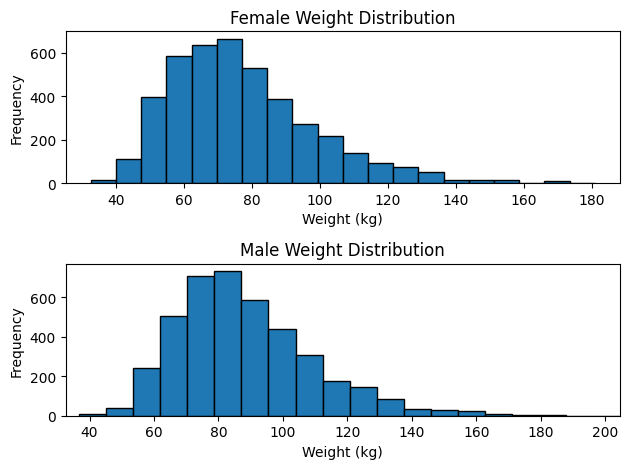

In [ ]:
# Create subplots for weight histograms
fig, (ax1, ax2) = plt.subplots(2)

# Plot female weight histogram
ax1.hist(female_df["weight"], bins=20, edgecolor="black")
ax1.set_title("Female Weight Distribution")
ax1.set_xlabel("Weight (kg)")
ax1.set_ylabel("Frequency")

# Plot male weight histogram
ax2.hist(male_df["weight"], bins=20, edgecolor="black")
ax2.set_title("Male Weight Distribution")
ax2.set_xlabel("Weight (kg)")
ax2.set_ylabel("Frequency")

# Set common x-axis limits for both histograms
plt.xlim(min(female_df["weight"].min(), male_df["weight"].min()), max(female_df["weight"].max(), male_df["weight"].max()))
plt.tight_layout()
plt.show()

# Discussion: From the histograms, we can observe that both male and female weight distributions appear somewhat bell-shaped, but with a slight positive skew. Males tend to have a wider range of weights compared to females.

##Results:


Female Weights: The distribution shows the range and concentration of body weights for females in this dataset.

Male Weights: Similarly, the male weight distribution is plotted for comparison.

# 5. Box-plot and whisker-plot for weights

Now compare the distributions of male and female weights using a box-and-whisker plot. This visualization will highlight the IQR,median, and possible outliers for both groups.

<ipython-input-5-fde871939e0d>:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([female_weight, male_weight], labels=["Female", "Male"])


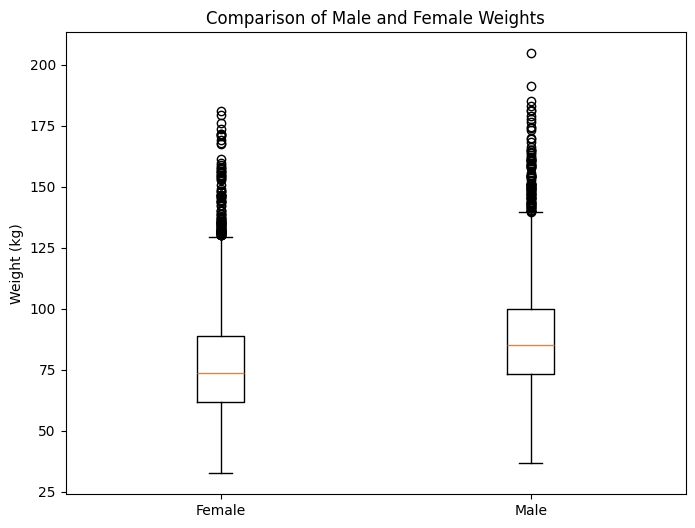

In [ ]:
# Create a boxplot for male and female weights
plt.figure(figsize=(8, 6))
# Convert the columns to numeric before creating the boxplot
# errors='coerce' will turn non-numeric values into NaN, which we will then drop
female_weight = pd.to_numeric(female_df.iloc[:, 0], errors='coerce').dropna()
male_weight = pd.to_numeric(male_df.iloc[:, 0], errors='coerce').dropna()
plt.boxplot([female_weight, male_weight], labels=["Female", "Male"])
plt.title("Comparison of Male and Female Weights")
plt.ylabel("Weight (kg)")
plt.show()



The boxplot visually demonstrates the central tendency (median) and variability (IQR) in weight for both males and females.

It also shows any potential outliers in the dataset.

# 6. Basic Statistical Analysis of Male and Female Weights

To compute the basic numerical aggregates for male and female weights. This includes measures such as the mean,median and standard deviation.

In [ ]:
# Compute statistical measures for male and female weights
female_weights = pd.to_numeric(female_df.iloc[:, 0], errors='coerce').dropna().values
male_weights = pd.to_numeric(male_df.iloc[:, 0], errors='coerce').dropna().values

female_mean = np.mean(female_weights)
male_mean = np.mean(male_weights)
female_median = np.median(female_weights)
male_median = np.median(male_weights)
female_std = np.std(female_weights)
male_std = np.std(male_weights)

print(f"Female Mean Weight: {female_mean:.2f} kg")
print(f"Male Mean Weight: {male_mean:.2f} kg")
print(f"Female Median Weight: {female_median:.2f} kg")
print(f"Male Median Weight: {male_median:.2f} kg")
print(f"Female Weight Std. Dev.: {female_std:.2f} kg")
print(f"Male Weight Std. Dev.: {male_std:.2f} kg")

Female Mean Weight: 77.40 kg
Male Mean Weight: 88.36 kg
Female Median Weight: 73.60 kg
Male Median Weight: 85.00 kg
Female Weight Std. Dev.: 21.54 kg
Male Weight Std. Dev.: 21.42 kg



#Discussion
 Calculate the mean,median and standard deviation for both male and female weights.

# 7.Adding BMI and standardizing the female data set
To enhance our analysis,  add the Body Mass Index (BMI) to the female dataset. BMI is computed as weight (kg) divided by height (m) squared.Next,  standardize the female dataset by computing the z-scores for each column. This allows us to compare the variables on the same scale.

In [ ]:
# Calculate BMI
female_df["BMI"] = female_df["weight"] / ((female_df["height"] / 100) ** 2)

# Standardize female data
zfemale_df = (female_df - female_df.mean()) / female_df.std()

# 8. Scatterplot Matrix and Correlation Analysis

   Now create a scatterplot matrix for the standardized columns: height, weight, waist circumference, hip circumference, and BMI. Also compute Pearson's and Spearman's correlation coefficients for all pairs.

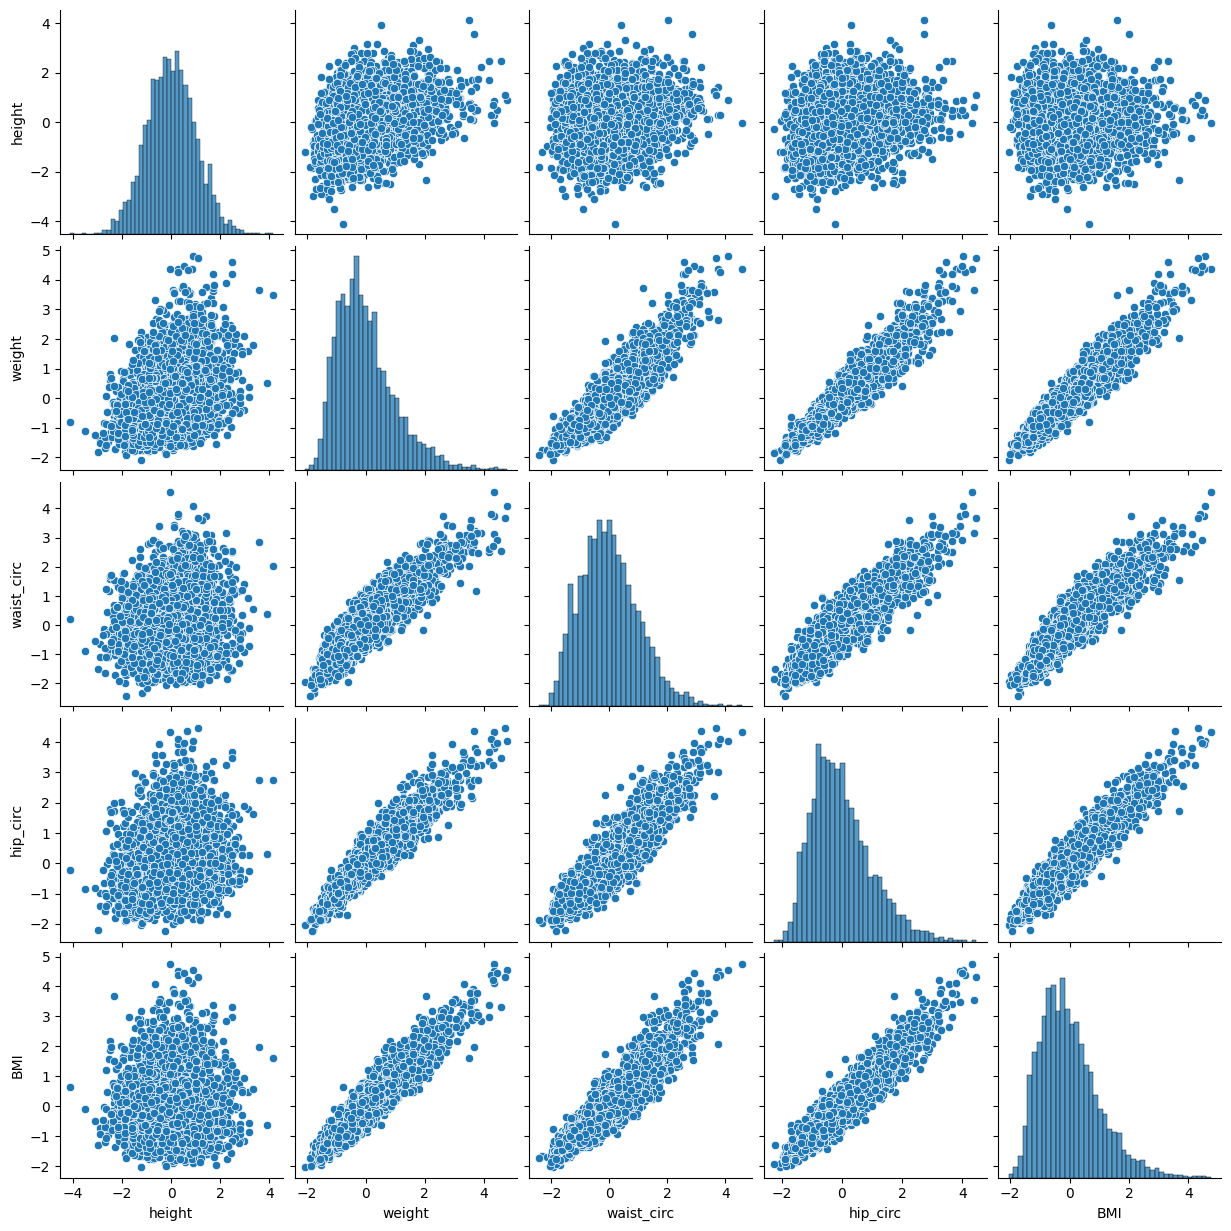


Pearson Correlations:
               height    weight  waist_circ  hip_circ       BMI
height      1.000000  0.345496    0.126547  0.202895  0.033077
weight      0.345496  1.000000    0.904550  0.946553  0.945900
waist_circ  0.126547  0.904550    1.000000  0.897407  0.921198
hip_circ    0.202895  0.946553    0.897407  1.000000  0.944199
BMI         0.033077  0.945900    0.921198  0.944199  1.000000

Spearman Correlations:
               height    weight  waist_circ  hip_circ       BMI
height      1.000000  0.338860    0.108587  0.205405  0.019897
weight      0.338860  1.000000    0.900169  0.946634  0.937999
waist_circ  0.108587  0.900169    1.000000  0.888037  0.923114
hip_circ    0.205405  0.946634    0.888037  1.000000  0.934196
BMI         0.019897  0.937999    0.923114  0.934196  1.000000


In [ ]:
# Scatterplot matrix
sns.pairplot(zfemale_df[["height", "weight", "waist_circ", "hip_circ", "BMI"]])
plt.show()

# Correlations
corr_pearson = zfemale_df[["height", "weight", "waist_circ", "hip_circ", "BMI"]].corr(method='pearson')
corr_spearman = zfemale_df[["height", "weight", "waist_circ", "hip_circ", "BMI"]].corr(method='spearman')
print("\nPearson Correlations:\n", corr_pearson)
print("\nSpearman Correlations:\n", corr_spearman)

## Interpretation:

The scatterplot matrix shows relationships between pairs of variables.

Correlation coefficients indicate the strength of linear (Pearson) and rank-based (Spearman) relationships.

# 9.Calculating the Waist-to-Height and Waist-to-Hip Ratios

 Calculate the waist-to-height ratio and waist-to-hip ratio for both male and female participants by adding two new columns to their respective matrices.

In [ ]:
# Body Composition Ratios

male_df["Waist-to-Height Ratio"] = male_df["waist_circ"] / male_df["height"]
male_df["Waist-to-Hip Ratio"] = male_df["waist_circ"] / male_df["hip_circ"]
female_df["Waist-to-Height Ratio"] = female_df["waist_circ"] / female_df["height"]
female_df["Waist-to-Hip Ratio"] = female_df["waist_circ"] / female_df["hip_circ"]

# 10. Visualizing the Waist-to-Height and Waist-to-Hip Ratios

 Now use boxplots to compare the waist-to-height ratio and waist-to-hip ratio for both male and female participants.

<ipython-input-10-fbb6fcd53853>:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([


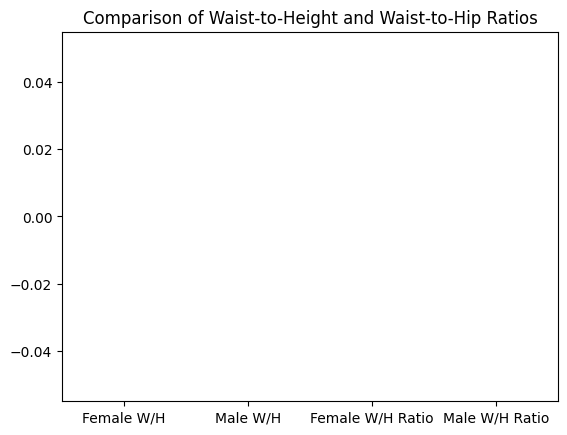

In [ ]:
# Boxplots for ratios
plt.boxplot([
    female_df["Waist-to-Height Ratio"], male_df["Waist-to-Height Ratio"],
    female_df["Waist-to-Hip Ratio"], male_df["Waist-to-Hip Ratio"]
], labels=["Female W/H", "Male W/H", "Female W/H Ratio", "Male W/H Ratio"], notch=True)
plt.title("Comparison of Waist-to-Height and Waist-to-Hip Ratios")
plt.show()

##Interpretation:
The box plot visually compares the distributions of waist-to-height ratio (WHR) and waist-to-hip ratio (WHR) for both male and female participants.

##Key Observations:

The box plot highlights that females tend to have a higher WHR compared to males, while the difference in WHR between genders is less prominent. This suggests that while females may have a higher overall waist circumference relative to their height, their body shapes, as indicated by WHR, may be more similar to males compared to their WHR.

#11. Discussion of BMI, Waist-to- Height, and Waist-to-Hip Ratios

##Advantages and Disadvantages:

##BMI:
 Easy to calculate but does not differentiate between muscle mass and fat.

##Waist-to-Height Ratio:
 More reliable than BMI for assessing fat distribution, especially abdominal fat.

##Waist-to-Hip Ratio:  
Helps identify risk for cardiovascular diseases but may not apply universally.

#12.Analyzing the 5 Lowest and Highest BMI Participants

Finally, analyze the standardized body measurements for the 5 participants with the lowest BMI and the 5 participants with the highest BMI.

In [ ]:
# Extreme BMI Cases
# Filter out NaN values from BMI before using argsort
bmi_values = zfemale_df["BMI"].dropna()
lowest_bmi_indices = bmi_values.argsort()[:5].tolist()
highest_bmi_indices = bmi_values.argsort()[-5:].tolist()
print("\nStandardized Measurements for 5 Lowest BMI:")
print(zfemale_df.loc[lowest_bmi_indices])
print("\nStandardized Measurements for 5 Highest BMI:")
print(zfemale_df.loc[highest_bmi_indices])


Standardized Measurements for 5 Lowest BMI:
        weight    height  arm_length  leg_length  arm_circ  hip_circ  \
262  -1.021292 -1.491859   -1.632903   -1.666599 -1.142737 -0.824253   
3478  0.538231  0.292121    0.626117   -0.982288 -0.394024  0.353400   
2126  0.069446  0.023108   -0.226343   -0.515713  0.069465 -0.037017   
2753  1.099844  0.405389    0.413002    1.661639  1.014269  0.724617   
1209 -0.120853  1.254904    0.413002    0.884014 -0.376198 -0.472237   

      waist_circ       BMI  
262    -0.447603 -0.689691  
3478    1.500719  0.480339  
2126    0.069651  0.077575  
2753    1.627159  1.024805  
1209   -0.039547 -0.504612  

Standardized Measurements for 5 Highest BMI:
        weight    height  arm_length  leg_length  arm_circ  hip_circ  \
2268 -0.148702 -0.019368   -0.268966    0.075283 -0.269239 -0.043418   
3022 -0.246172  2.345114    1.137593    1.910480 -0.804034 -0.606643   
1472 -0.854200 -1.392749   -1.419788   -1.604389 -0.465330 -0.971460   
1104  0.023031

##Interpretation:

The body measurements for the lowest and highest BMI participants give insights into the physical characteristics associated with extreme BMIs.

#Conclusion

In this notebook, we explored various body measurements and their relationships using data from the NHANES survey. We conducted visual analyses, calculated descriptive statistics, and interpreted the results based on the body composition of adult males and females.